# Workshop

1) Introduction to Pytorch (Tensors)

2) Pytorch and GPU

3) Build a NN with Pytorch

4) Train NN sequentially

5) Train NN in GPU

5) Train NN with multiples GPUs (Data Parallelism and Model Parallelism)

6) Introduction to Multiprocessing with Python

7) Train NN using Multiprocessing

# Install Libraries

Instal Pytorch and torchvision: https://pytorch.org/get-started/locally/

1)torchvision

2)torch

# Import libraries

In [1]:
# Pytorch
import torchvision
import matplotlib.pyplot as plt
import random
import torch
from torch.utils.data import DataLoader, Subset
import numpy as np
import time
import torch.multiprocessing as mp 
import os
import torch.nn.functional as F
from torchvision import models

# Multiprocessing Python
from multiprocessing import Process

# Introduction to [Pytorch](https://pytorch.org/tutorials/ )

In [142]:
a = torch.Tensor([1, 2])

b = torch.Tensor([2, 3])

c = a + b

print(c)

tensor([3., 5.])


# Introduction to GPU in Pytorch [(documentation)](https://pytorch.org/docs/stable/cuda.html)

In [143]:
torch.cuda.is_available()

True

In [47]:
torch.cuda.current_device()

0

In [48]:
torch.cuda.get_device_name(0)

'GeForce GTX 1070'

In [94]:
torch.cuda.get_device_properties('cuda')

_CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8119MB, multi_processor_count=16)

In [95]:
torch.cuda.device_count()

1

In [25]:
# Returns the current GPU memory usage by 
# tensors in bytes for a given device
torch.cuda.memory_allocated()

0

In [24]:
# Returns the current GPU memory managed by the
# caching allocator in bytes for a given device
torch.cuda.memory_cached()

0

In [26]:
# Releases all unoccupied cached memory currently held by
# the caching allocator so that those can be used in other
# GPU application and visible in nvidia-smi
torch.cuda.empty_cache()

In [61]:
# Select device (CUDA or CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


## Working with tensors

In [135]:
# CPU storage
a = torch.Tensor([1., 2.])

# CPU storage
b = torch.Tensor([2, 3])

# CPU storage
c = a + b

print(c)

tensor([3., 5.])


In [2]:
# Move to GPU

a = a.to(device)
a = a.to('cuda')

print(a.get_device())
print(b.get_device())

b = b.to(device)
d = a + b

NameError: name 'a' is not defined

# NN for image classification using Pytorch (CPU, GPU)

# Load data

In [2]:
# Get training data
train_data = torchvision.datasets.MNIST('dataset', 
                                        train=True, 
                                        download=True, 
                                        transform=torchvision.transforms.ToTensor())

# Get test data
test_data = torchvision.datasets.MNIST('dataset', 
                                        train = False, 
                                        download = True,
                                        transform = torchvision.transforms.ToTensor())

Display data

Label:  4


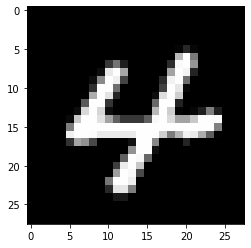

In [8]:
# Display an example
data = train_data[random.randint(0, len(train_data))]

print('Label: ', data[1])

image = data[0]

# plotting
plt.imshow(image.numpy()[0, :, :], cmap = 'gray')

# Crate data loader

In [3]:
# Get training loader
train_loader = DataLoader(train_data, shuffle = True, batch_size = 32)

# Get testing loader
test_loader = DataLoader(test_data, shuffle = False, batch_size = 256)

# Model architecture

In [4]:
# Convolutional network (Intento de LeNet)
class conv_net(torch.nn.Module):
    
    def __init__(self):
        
        super(conv_net, self).__init__()
        
        # First layer
        self.conv1 = torch.nn.Conv2d(1, 60, kernel_size = 5, stride = 1, padding = 2, bias = True) 
        self.avgpooling = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
        
        # Activation layer
        self.act = torch.nn.Tanh()
        
        # Second layer
        self.conv2 = torch.nn.Conv2d(60, 16*2, kernel_size = 5, stride = 1, padding = 0, bias = True)
        
        # Fully connected layer
        self.fcc = torch.nn.Linear((16*2)*5*5, 120, bias = True)
        self.fc = torch.nn.Linear(120, 84, bias = True)
        
        # Outputlayer
        self.soft_fc = torch.nn.Sequential(
        
            torch.nn.Linear(84, 10, bias = True),
            torch.nn.Softmax()
            
        )
        
        
    def forward(self, x):
        
        input_size = x.size(0)
        
        # First conv layer
        x = self.act(self.conv1(x))
        x = self.avgpooling(x)
        
        # Second conv layer
        x = self.act(self.conv2(x))
        x = self.avgpooling(x)
        
        # Flatting layer
        x = x.view(input_size, -1)
        
        # Fully connected layer
        x = self.act(self.fcc(x))
        x = self.act(self.fc(x))
        
        # Output layer
        x = self.soft_fc(x)
 
        # Return result
        return x

# Load model

In [27]:
model = conv_net()

# Define optimizer

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.NLLLoss()

# Global variables for training

In [20]:
epochs = 2

# Training model sequentially

In [21]:
# epochs = 2

start_time = time.time()

print('PID ', os.getpid())

for epoch in range(epochs):

    print('Epoch ', epoch)
    
    # Training
    for data, label in train_loader:
        
        # make predictions
        prediction = model(data)
        
        # zero gradient = not acumulating value
        optimizer.zero_grad()  
        
        # get loss value
        loss = criterion(prediction, label)  
                  
        # backprop
        loss.backward()
        
        # Update parameters
        optimizer.step()
        

print('Sequential trainig time: {0} [sec]'.format(time.time() - start_time))

PID  5689
Epoch  0
Epoch  1
Sequential trainig time: 32.394986152648926 [sec]


# Evaluate model

In [13]:
# model = model_seq

# model = model_mp

print(model)

conv_net(
  (conv1): Conv2d(1, 60, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (avgpooling): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (act): Tanh()
  (conv2): Conv2d(60, 32, kernel_size=(5, 5), stride=(1, 1))
  (fcc): Linear(in_features=800, out_features=120, bias=True)
  (fc): Linear(in_features=120, out_features=84, bias=True)
  (soft_fc): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
    (1): Softmax()
  )
)


In [22]:
# Without gradient
with torch.no_grad():
    
    predictions = np.empty(len(test_data))
    labels = np.empty(len(test_data))
    
    criterion = torch.nn.NLLLoss()
    
    # For compute accuracy
    total = 0
    
    # minibatches for validation dataset
    for data, label in test_loader:
        
        # get prediction ussing trained model
        prediction = model(data)
       
        loss = criterion(prediction, label) 
        
        # get prediction (max of prediction vector)
        _, predicted = torch.max(prediction.data, 1)
        
        predictions[total: total + 256] = predicted.numpy()
        
        labels[total: total + 256] = label
        
        # Get total of instances
        total += label.size(0)

# Model metrics

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

f1_score = f1_score(labels, predictions, average='macro')
accuracy = accuracy_score(labels, predictions)

print("f1 score: {0:.2f}".format(f1_score))
print('accuracy score: {0:.2f}'.format(accuracy_score(labels, predictions)))

f1 score: 0.93
accuracy score: 0.93


# Training model in GPU

Model has tensors (Parameters)

In [24]:
for name, param in model.named_parameters():
    
#     if param.requires_grad:
        
    print(name, type(param.data))

conv1.weight <class 'torch.Tensor'>
conv1.bias <class 'torch.Tensor'>
conv2.weight <class 'torch.Tensor'>
conv2.bias <class 'torch.Tensor'>
fcc.weight <class 'torch.Tensor'>
fcc.bias <class 'torch.Tensor'>
fc.weight <class 'torch.Tensor'>
fc.bias <class 'torch.Tensor'>
soft_fc.0.weight <class 'torch.Tensor'>
soft_fc.0.bias <class 'torch.Tensor'>


In [25]:
use_gpu = torch.cuda.is_available()

if use_gpu:
    
    # Allocate model in GPU
    model = model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.NLLLoss()

# epochs = 2

start_time = time.time()

# print('PID ', os.getpid())

for epoch in range(epochs):

    print('Epoch ', epoch)
    
    # Training
    for data, label in train_loader:
        
        # If GPU
        if use_gpu:
            
            data, label = data.to('cuda'), label.to('cuda')
            
        # make predictions
        prediction = model(data)
        
        # zero gradient = not acumulating value
        optimizer.zero_grad()  
        
        # get loss value
        loss = criterion(prediction, label)  
                  
        # backprop
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
if use_gpu:
    
    model = model.to('cpu')
    
print('GPU trainig time: {0} [sec]'.format(time.time() - start_time))

Epoch  0


/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch  1
GPU trainig time: 19.308272123336792 [sec]


# Training model in multiple GPU (Data Parallelism) [link](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html)

In [30]:
# Check if it has more than 1 GPU
if torch.cuda.device_count() > 1:
    
    print("Let's use", torch.cuda.device_count(), " GPUs!")
    
    # It will be parallelized over multiple GPUs in the batch dimension
    # Data Parallelism is when we split the mini-batch of samples 
    # into multiple smaller mini-batches and run the computation 
    # for each of the smaller mini-batches in parallel.
    
    # DataParallel splits your data automatically
    # and sends job orders to multiple models on 
    # several GPUs. After each model finishes their job, 
    # DataParallel collects and merges the results before returning it to you.
    model = torch.nn.DataParallel(model)

else:
    
    print("Let's use", torch.cuda.device_count(), " GPU :( !")
    

# To GPU
model.to('cpu')

Let's use 1  GPU :( !


conv_net(
  (conv1): Conv2d(1, 60, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (avgpooling): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (act): Tanh()
  (conv2): Conv2d(60, 32, kernel_size=(5, 5), stride=(1, 1))
  (fcc): Linear(in_features=800, out_features=120, bias=True)
  (fc): Linear(in_features=120, out_features=84, bias=True)
  (soft_fc): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
    (1): Softmax()
  )
)

In [34]:
use_gpu = torch.cuda.is_available()

# if use_gpu:
    
#     # Allocate model in GPU
#     model = model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.NLLLoss()

# epochs = 2

start_time = time.time()

# print('PID ', os.getpid())

for epoch in range(epochs):

    print('Epoch ', epoch)
    
    # Training
    for data, label in train_loader:
        
        # If GPU
        if use_gpu:
            
            data, label = data.to('cuda'), label.to('cuda')
            
        # make predictions
        prediction = model(data)
        
        # zero gradient = not acumulating value
        optimizer.zero_grad()  
        
        # get loss value
        loss = criterion(prediction, label)  
                  
        # backprop
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
if use_gpu:
    
    model = model.to('cpu')
    
print('GPU trainig time: {0} [sec]'.format(time.time() - start_time))

Epoch  0


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

# Model Parallelism [link](https://pytorch.org/tutorials/intermediate/model_parallel_tutorial.html)

What when models are too big to fit in 1 GPU?

Multiples GPUs

In [ ]:
class model(nn.Module):
    
    def __init__(self):
        
        super(model, self).__init__()
        
        self.net1 = torch.nn.Linear(10, 10).to('cuda:0')
        
        self.relu = torch.nn.ReLU()
        
        self.net2 = torch.nn.Linear(10, 5).to('cuda:1')

    def forward(self, x):
        
        x = self.relu(self.net1(x.to('cuda:0')))
        
        return self.net2(x.to('cuda:1'))

CPU and GPU

In [31]:
class Model_CPU_GPU(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.layer_1 = torch.nn.Linear(10, 100)
        self.layer_2 = torch.nn.Linear(100,2).to('cuda')

    def forward(self, x):
        
        # Compute on CPU
        x = self.layer_1(x)
        
        # Transfer to GPU
        x = x.cuda(0)

        # Computeon GPU
        x = self.layer_2(x)
        
        return x

NameError: name 'nn' is not defined

# Multiprocessing in Python

- Class Process (one task to one process)
- Class Pool (pool of workers)

In [33]:
# function 
def func(rank):
    
    print('PID: ', os.getpid())
    
#     time.sleep(rank)
    
#     print('Exiting PID ', os.getpid())
    
# Like main method
if __name__ == '__main__':
    
    # Get number of processes
    num_processes = 4
    
    # List of processes
    processes = []
    
    # Create process
    for rank in range(num_processes):
        
        p = Process(target = func, args = (rank, ))
         
        # Start process
        p.start()
        
        # add process
        processes.append(p)
        
    # Wait until all processes finish
    for p in processes:
        
        # Wait process finish
        p.join()

PID:  6686
PID:  6689
PID:  6692
PID:  6695


# Train model Multiprocessing

## Train function for MP

It mus to run from zero because it fails if try to run after other processes)

In [7]:
def train(model):
    
    print('Train function')
    
    train_loader = DataLoader(train_data, shuffle=True, batch_size=32, num_workers = 1)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
        
    model.train()
    
    pid = os.getpid()
    
    print('PID: ', pid)
    
    for epoch in range(2):
        
        print('Epoch ', epoch)
        
#         for batch_idx, (data, target) in enumerate(train_loader):
        for data, label in train_loader:
        
            print('new train')
            optimizer.zero_grad()

            output = model(data)

            loss = F.nll_loss(output, label)

            loss.backward()

            optimizer.step()
            
#             if batch_idx % 100 == 0:
                
#             print(batch_idx)
#                 print('PID {} iteration {}'.format(pid, batch_idx))

    
#     return

In [8]:
# Main method
if __name__ == '__main__':
    
#     mp.set_start_method('spawn') # it must to run only one time
    
    model = conv_net()
    
    start_time = time.time()
    
    model.share_memory()
    
    processes = []
    
    num_process = 2
    
    for rank in range(num_process):
        
        p = mp.Process(target = train, args = (model, ))
        
        p.start()
        
        processes.append(p)
        
    for p in processes:
        
        p.join()
        
    print('MP time: {} [sec]'.format(time.time() - start_time))

Train function
PID:  6843
Epoch  0
Train function
PID:  6846
Epoch  0
new train
new train


/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train
new train


Process Process-4:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-7-239570556d4a>", line 25, in train
    output = model(data)
  File "/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 493, in __call__
    result = self.forward(*input, **kwargs)
  File "<ipython-input-4-b26bfe4fdfc9>", line 36, in forward
    x = self.act(self.conv1(x))
  File "/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 493, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/torch/nn/modules/conv.py", line 338, in forward
    self.padding, self.dilation, self.groups)
KeyboardInterrupt
